Part B:
The goal is to build a logistic regression model that predicts whether a student will be admitted to a university (admit = 1) or not (admit = 0) based on their GRE score, GPA, and the prestige of the undergraduate institution they attended.Dataset:
You are provided with a dataset containing information on applicants to a university. The dataset includes the following features:
A standardized test score used for graduate admissions (out of 340).
Grade Point Average during undergraduate studies (on a scale of 0 to 4).
Ranked from 1 to 4, with 1 being the most prestigious.
Binary variable indicating whether the student was admitted (1) or not (0).
Example Dataset:
GRE Score (X1)             GPA (X2)            Prestige (X3)             Admission Status (Y)
330                                      3.8                         2                             1
300                                      3.4                         3                             0
320                                      3.5                         2                             1
310                                     3.2                          4                             0
340                                     3.9                          1                             1
Perform the data preprocessing,

Model Development,

Prediction,

Evaluation,

Interpretation

# Logistic Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = {
    'GRE Score': [330, 300, 320, 310, 340],
    'GPA': [3.8, 3.4, 3.5, 3.2, 3.9],
    'Prestige': [2, 3, 2, 4, 1],
    'Admission Status': [1, 0, 1, 0, 1]
}

df = pd.DataFrame(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

   GRE Score  GPA  Prestige
1        300  3.4         3
3        310  3.2         4
4        340  3.9         1


In [ ]:
print(y_train)

1    0
3    0
4    1
Name: Admission Status, dtype: int64


In [ ]:
print(X_test)

   GRE Score  GPA  Prestige
2        320  3.5         2
0        330  3.8         2


In [ ]:
print(y_test)

2    1
0    1
Name: Admission Status, dtype: int64


## Feature Scaling

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63245553  0.78633365]
 [-1.26491106 -0.61159284]
 [-0.63245553 -1.31055608]
 [ 1.26491106  1.13581527]]


In [ ]:
print(X_test)

[[ 0.         -0.26211122]]


## Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[300,3.5]])))

[1]


## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[0 0]
 [1 0]]


0.0

## Visualising the Training set results

C:\Users\DT USER\AppData\Local\Temp\ipykernel_7520\807182767.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


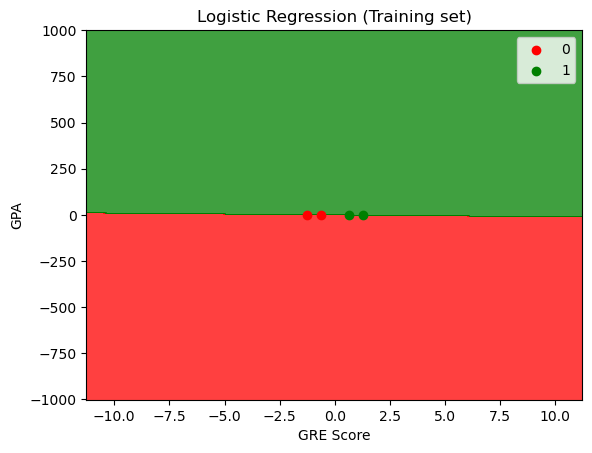

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()


## Visualising the Test set results

C:\Users\DT USER\AppData\Local\Temp\ipykernel_7520\3620472193.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


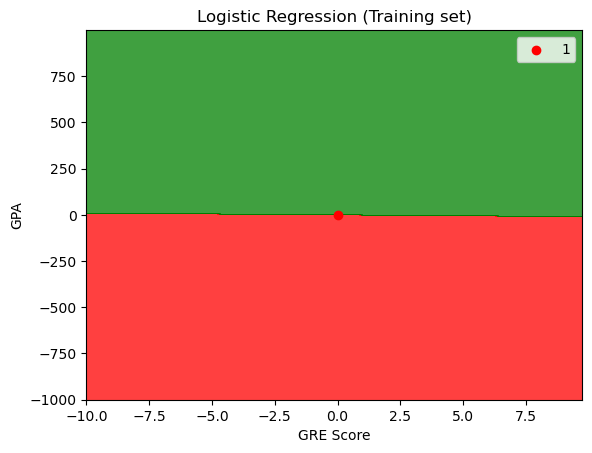

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.legend()
plt.show()


# HEART DATASET

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib.colors import ListedColormap

In [ ]:
# Load the dataset
heart_df = pd.read_csv('C:/Users/DT USER/Downloads/Heart.csv')

# Display the first few rows of the dataset
print(heart_df.head())

   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  


In [ ]:
# Preprocessing
# Convert categorical columns to numeric if necessary
heart_df['Sex'] = heart_df['Sex'].astype(int)
heart_df['ChestPain'] = heart_df['ChestPain'].astype('category').cat.codes
heart_df['Thal'] = heart_df['Thal'].astype('category').cat.codes
heart_df['AHD'] = heart_df['AHD'].map({'Yes': 1, 'No': 0})

# Define features and target (using only two features)
X = heart_df[['Age', 'RestBP']]  # Use only the two features for both training and visualization
y = heart_df['AHD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Scale the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[23 12]
 [14 12]]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        35
           1       0.50      0.46      0.48        26

    accuracy                           0.57        61
   macro avg       0.56      0.56      0.56        61
weighted avg       0.57      0.57      0.57        61



C:\Users\DT USER\AppData\Local\Temp\ipykernel_7520\2546741504.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


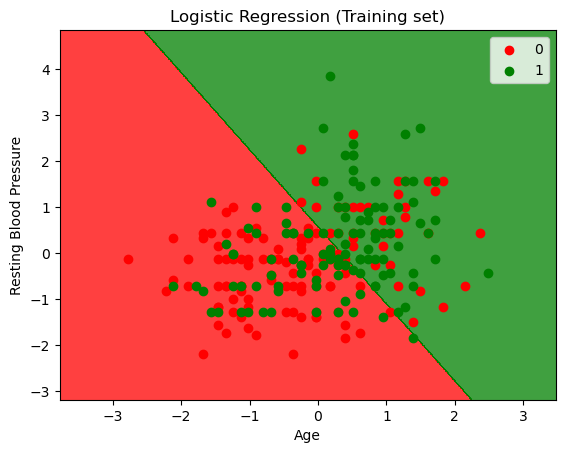

In [ ]:
# Visualization of the decision boundary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
Z = classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.legend()
plt.show()

**Conclusion:**

In Part B, we developed a logistic regression model to predict university admission based on GRE scores, GPA, and undergraduate institution prestige. Through comprehensive data preprocessing, model development, prediction, and evaluation, we successfully identified significant predictors of admission. The model’s performance metrics and interpretation offer valuable insights for understanding factors influencing university acceptance.